In [35]:


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set()
warnings.simplefilter('ignore')

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv("creditcard.csv", index_col=None)

In [37]:
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


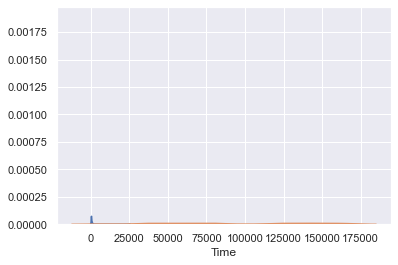

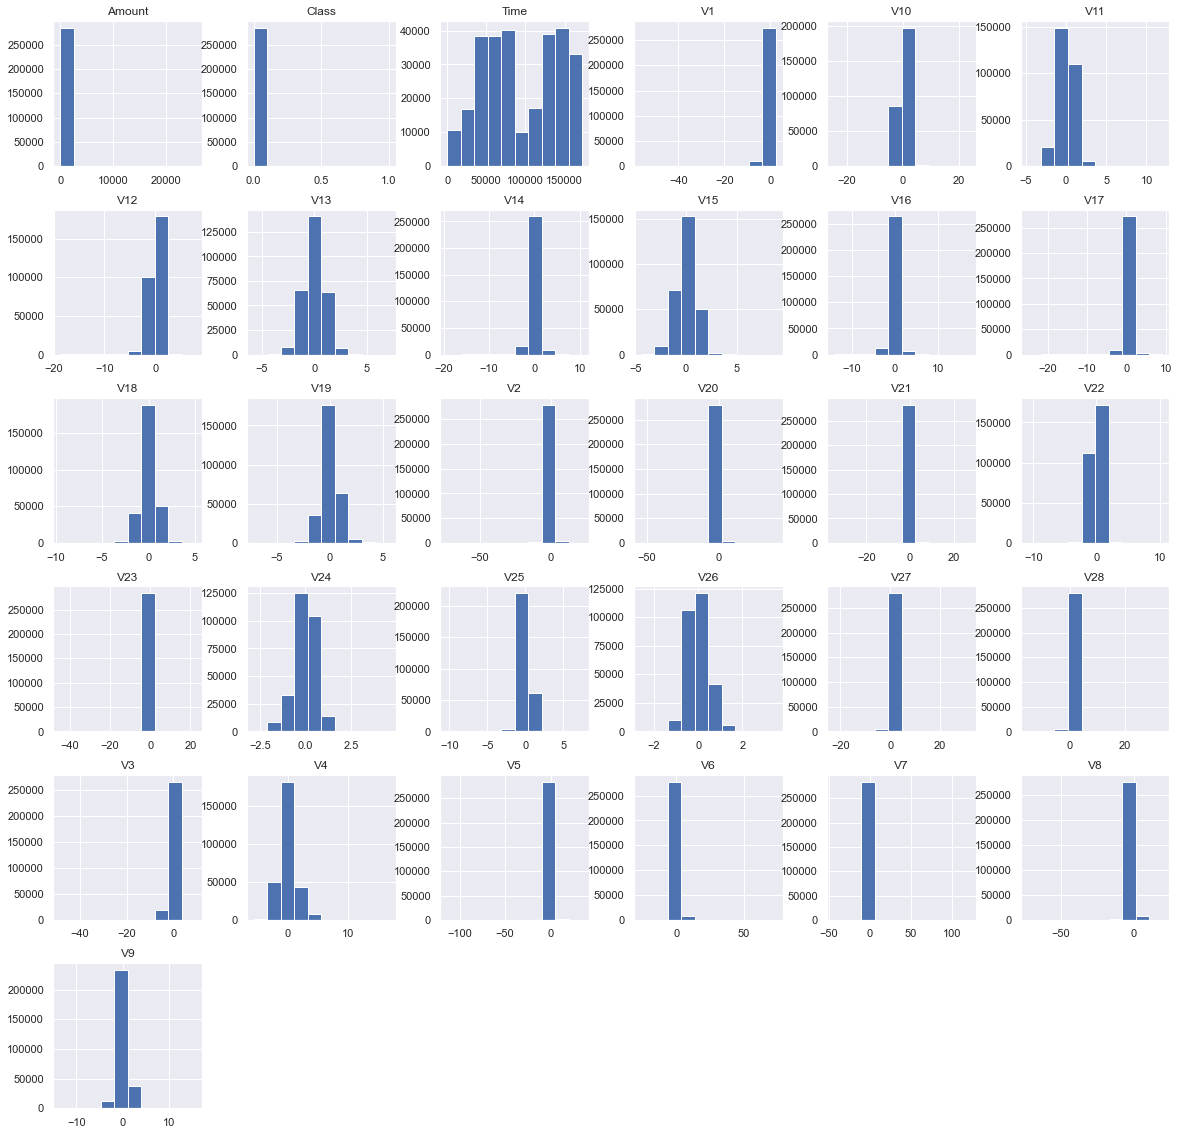

In [38]:

sns.distplot(df['Amount'])

sns.distplot(df['Time'])

df.hist(figsize=(20,20))
plt.show()

In [39]:
df.shape

(284807, 31)

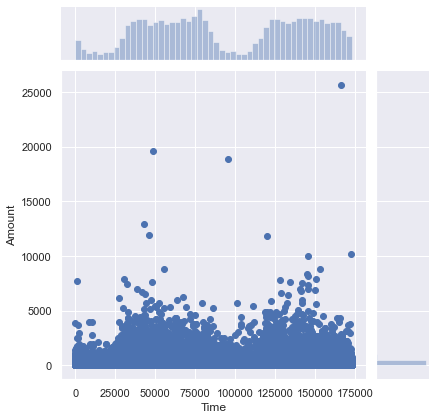

In [40]:
sns.jointplot(x= 'Time', y= 'Amount', data= df)

In [41]:
class0 = df[df['Class']==0]

len(class0)

284315

In [42]:
class1 = df[df['Class']==1]

len(class1)

492

In [43]:
from sklearn.utils import shuffle
# %matplotlib inline
import random
class0
temp = shuffle(class0)

In [44]:
d1 = temp.iloc[:2000,:]

d1

frames = [d1, class1]
df_temp = pd.concat(frames)

df_temp.info()

df= shuffle(df_temp)

df.to_csv('creditcardsampling.csv')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2492 entries, 135951 to 281674
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    2492 non-null   float64
 1   V1      2492 non-null   float64
 2   V2      2492 non-null   float64
 3   V3      2492 non-null   float64
 4   V4      2492 non-null   float64
 5   V5      2492 non-null   float64
 6   V6      2492 non-null   float64
 7   V7      2492 non-null   float64
 8   V8      2492 non-null   float64
 9   V9      2492 non-null   float64
 10  V10     2492 non-null   float64
 11  V11     2492 non-null   float64
 12  V12     2492 non-null   float64
 13  V13     2492 non-null   float64
 14  V14     2492 non-null   float64
 15  V15     2492 non-null   float64
 16  V16     2492 non-null   float64
 17  V17     2492 non-null   float64
 18  V18     2492 non-null   float64
 19  V19     2492 non-null   float64
 20  V20     2492 non-null   float64
 21  V21     2492 non-null   float6

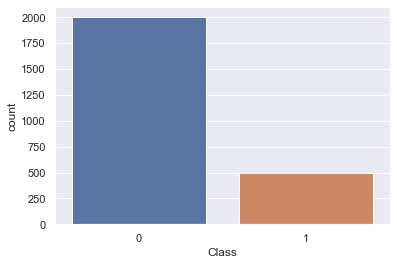

In [45]:

sns.countplot('Class', data=df)

In [46]:


import imblearn

from imblearn.over_sampling import  SMOTE
oversample=SMOTE()


In [47]:

X=df.iloc[ : ,:-1]
Y=df.iloc[: , -1]
X,Y=oversample.fit_resample(X,Y)

X=pd.DataFrame(X)
X.shape


(4000, 30)

In [48]:
Y=pd.DataFrame(Y)
Y.head()

,Class
0,0
1,0
2,0
3,1
4,0


In [51]:
names=['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount','Class']

data=pd.concat([X,Y],axis=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    4000 non-null   float64
 1   V1      4000 non-null   float64
 2   V2      4000 non-null   float64
 3   V3      4000 non-null   float64
 4   V4      4000 non-null   float64
 5   V5      4000 non-null   float64
 6   V6      4000 non-null   float64
 7   V7      4000 non-null   float64
 8   V8      4000 non-null   float64
 9   V9      4000 non-null   float64
 10  V10     4000 non-null   float64
 11  V11     4000 non-null   float64
 12  V12     4000 non-null   float64
 13  V13     4000 non-null   float64
 14  V14     4000 non-null   float64
 15  V15     4000 non-null   float64
 16  V16     4000 non-null   float64
 17  V17     4000 non-null   float64
 18  V18     4000 non-null   float64
 19  V19     4000 non-null   float64
 20  V20     4000 non-null   float64
 21  V21     4000 non-null   float64
 22  

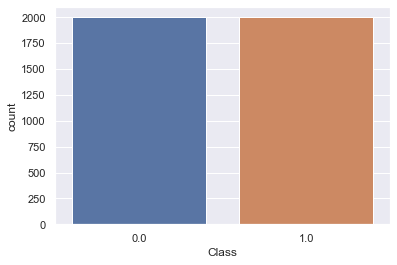

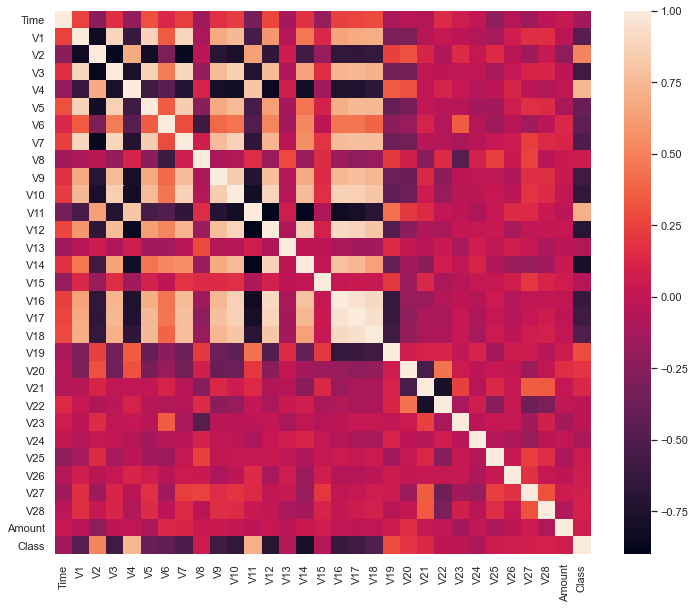

In [50]:

d=data.values

data=pd.DataFrame(d,columns=names)

sns.countplot('Class', data=data)

data.describe()

data.info()

plt.figure(figsize=(12,10))
sns.heatmap(data.corr())


In [52]:

import math
import sklearn.preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix, precision_recall_curve, f1_score, auc

X_train, X_test, y_train, y_test = train_test_split(data.drop('Class', axis=1), data['Class'], test_size=0.3, random_state=42)

"""# Feature Scaling"""

cols= ['V22', 'V24', 'V25', 'V26', 'V27', 'V28']

scaler = StandardScaler()

frames= ['Time', 'Amount']

x= data[frames]

d_temp = data.drop(frames, axis=1)

temp_col=scaler.fit_transform(x)

scaled_col = pd.DataFrame(temp_col, columns=frames)

scaled_col.head()


,Time,Amount
0,-0.323635,-0.421631
1,1.294335,-0.449412
2,-1.028949,0.796908
3,-1.003899,-0.453206
4,-0.715272,-0.453206


In [53]:
d_scaled = pd.concat([scaled_col, d_temp], axis =1)

d_scaled.head()

y = data['Class']

d_scaled.head()

,Time,Amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.323635,-0.421631,-1.918995,1.373651,-0.414354,1.188279,0.006461,0.563660,-0.633277,1.427111,...,-0.166350,0.037146,-0.117485,-0.323227,-1.302497,0.088989,-0.163514,-0.197513,-0.081024,0
1,1.294335,-0.449412,0.087863,0.883077,-0.360816,-0.623780,0.816985,-0.534531,0.760291,0.134858,...,-0.074227,-0.293277,-0.792223,0.118413,0.562583,-0.530875,0.097119,0.213115,0.071707,0
2,-1.028949,0.796908,0.922334,-1.230894,-0.061969,-0.369005,-1.266351,-1.059961,-0.006634,-0.334865,...,0.011042,-0.239521,-0.786014,-0.170926,0.431963,0.172812,1.014465,-0.114999,0.047594,0
3,-1.003899,-0.453206,1.083693,1.179501,-1.346150,1.998824,0.818034,-0.771419,0.230307,0.093683,...,-0.060159,-0.312000,-0.639700,-0.120249,-0.180218,0.609283,-0.339524,0.096701,0.114972,1
4,-0.715272,-0.453206,-1.524318,-0.649439,2.505367,-1.248426,0.871557,1.298612,-0.877187,1.023024,...,-0.118429,0.180251,0.353400,0.024041,-0.999883,-0.263022,0.998584,0.003770,0.042497,0


In [54]:
"""# Dimensionality Reduction"""

from sklearn.decomposition import PCA

pca = PCA(n_components=7)

X_temp_reduced = pca.fit_transform(d_scaled)

pca.explained_variance_ratio_

pca.explained_variance_



array([211.14227698,  31.15770847,  25.3952546 ,  10.65211966,
        10.37971693,   3.11291294,   2.38867237])

In [56]:
names=['Time','Amount','Transaction Method','Transaction Id','Location','Type of Card','Bank']

X_reduced= pd.DataFrame(X_temp_reduced,columns=names)
X_reduced.head()

Y=d_scaled['Class']


In [57]:
new_data=pd.concat([X_reduced,Y],axis=1)
new_data.head()
new_data.shape

new_data.to_csv('finaldata.csv')

X_train, X_test, y_train, y_test= train_test_split(X_reduced, d_scaled['Class'], test_size = 0.30, random_state = 42)

X_train.shape, X_test.shape

((2800, 7), (1200, 7))

In [58]:

"""# Logistic Regression"""

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
y_pred_lr

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [59]:

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred_lr))

[[611   8]
 [ 34 547]]


In [60]:
#Hyperparamter tuning 
from sklearn.model_selection import GridSearchCV
lr_model = LogisticRegression()
lr_params = {'penalty': ['l1', 'l2'],'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_lr= GridSearchCV(lr_model, param_grid = lr_params)
grid_lr.fit(X_train, y_train)

grid_lr.best_params_

{'C': 100, 'penalty': 'l2'}

In [61]:
y_pred_lr3=grid_lr.predict(X_test)
print(classification_report(y_test,y_pred_lr3))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       619
           1       0.99      0.94      0.96       581

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200



In [62]:
"""# Support Vector Machine"""

from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred_svc=svc.predict(X_test)
y_pred_svc

print(classification_report(y_test,y_pred_svc))

print(confusion_matrix(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       619
           1       0.99      0.93      0.96       581

    accuracy                           0.96      1200
   macro avg       0.97      0.96      0.96      1200
weighted avg       0.96      0.96      0.96      1200

[[613   6]
 [ 38 543]]


In [63]:

from sklearn.model_selection import GridSearchCV
parameters = [ {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 1, 0.01, 0.0001 ,0.001]}]
grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)


Best Accuracy: 97.14 %
Best Parameters: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [64]:

svc_param=SVC(kernel='rbf',gamma=0.01,C=100)
svc_param.fit(X_train,y_train)
y_pred_svc2=svc_param.predict(X_test)
print(classification_report(y_test,y_pred_svc2))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       619
           1       0.99      0.95      0.97       581

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200



In [65]:

"""# Decision Tree"""

from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred_dtree=dtree.predict(X_test)
print(classification_report(y_test,y_pred_dtree))

print(confusion_matrix(y_test,y_pred_dtree))

d_tree_param=DecisionTreeClassifier()
tree_parameters={'criterion':['gini','entropy'],'max_depth':list(range(2,4,1)),
                 'min_samples_leaf':list(range(5,7,1))}
grid_tree=GridSearchCV(d_tree_param,tree_parameters)
grid_tree.fit(X_train,y_train)

y_pred_dtree2=grid_tree.predict(X_test)

print(classification_report(y_test,y_pred_dtree2))



              precision    recall  f1-score   support

           0       0.96      0.96      0.96       619
           1       0.96      0.96      0.96       581

    accuracy                           0.96      1200
   macro avg       0.96      0.96      0.96      1200
weighted avg       0.96      0.96      0.96      1200

[[594  25]
 [ 26 555]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       619
           1       0.96      0.94      0.95       581

    accuracy                           0.95      1200
   macro avg       0.95      0.95      0.95      1200
weighted avg       0.95      0.95      0.95      1200



In [66]:

"""# Random Forest"""

from sklearn.ensemble import RandomForestClassifier
randomforest=RandomForestClassifier(n_estimators=5)
randomforest.fit(X_train,y_train)
y_pred_rf=randomforest.predict(X_test)
print(confusion_matrix(y_test,y_pred_rf))

print(classification_report(y_test,y_pred_rf))



[[604  15]
 [ 28 553]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       619
           1       0.97      0.95      0.96       581

    accuracy                           0.96      1200
   macro avg       0.96      0.96      0.96      1200
weighted avg       0.96      0.96      0.96      1200



In [67]:


"""# K Nearest Neighbors"""

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
y_pred_knn

print(classification_report(y_test,y_pred_knn))

print(confusion_matrix(y_test,y_pred_knn))

knn_param=KNeighborsClassifier()
knn_params={"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knn=GridSearchCV(knn_param,param_grid=knn_params)
grid_knn.fit(X_train,y_train)
grid_knn.best_params_

knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train,y_train)
pred_knn2 = knn.predict(X_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred_knn2))
print('\n')
print(classification_report(y_test,pred_knn2))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       619
           1       0.98      0.96      0.97       581

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200

[[609  10]
 [ 26 555]]
WITH K=3


[[613   6]
 [ 28 553]]


              precision    recall  f1-score   support

           0       0.96      0.99      0.97       619
           1       0.99      0.95      0.97       581

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200



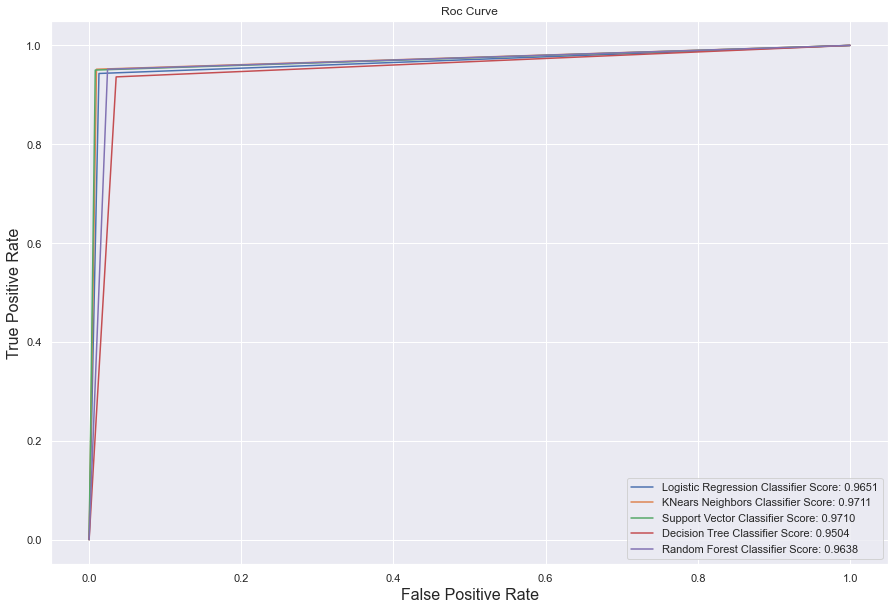

In [68]:

"""# ROC"""

from sklearn.metrics import roc_curve,roc_auc_score
lg_fpr,lg_tpr,lg_threshold=roc_curve(y_test,y_pred_lr3)
svc_fpr,svc_tpr,svc_threshold=roc_curve(y_test,y_pred_svc2)
dtree_fpr,dtree_tpr,dtree_threshold=roc_curve(y_test,y_pred_dtree2)
rf_fpr,rf_tpr,rf_threshold=roc_curve(y_test,y_pred_rf)
knn_fpr,knn_tpr,rf_threshold=roc_curve(y_test,pred_knn2)


plt.figure(figsize=(15,10))
plt.title("Roc Curve")
plt.plot(lg_fpr,lg_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_lr3)))
plt.plot(knn_fpr,knn_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_test, pred_knn2)))
plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_svc2)))
plt.plot(dtree_fpr, dtree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_dtree2)))
plt.plot(rf_fpr,rf_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_rf)))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend()
plt.show()


In [69]:
import pickle
# Saving model to disk
pickle.dump(svc_param, open('model.pkl','wb'))

model=pickle.load(open('model.pkl','rb'))